Student Details

Name: ***Chelliah Kanthanathan***

ID: ***18263003***

# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [68]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the interval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

### Task 1

Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv and draw initial conclusions from the results you observe.

In [18]:
lab5_df = pd.read_csv("./winequality_red.csv")
lab5_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
lab5_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# target attribute
target_attribute_name = 'quality'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [20]:
# prepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [60]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[ True  True False False  True False False False False  True  True]
[1 1 7 3 1 5 4 2 6 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [61]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression(solver='lbfgs',multi_class='auto')
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True  True False False False  True False False  True  True]
[4 1 1 5 2 6 1 3 7 1 1]


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [62]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [63]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [64]:
classifier = svm.SVC(gamma='auto')

In [65]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.553125

In [66]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.565625

In [67]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.5625

#### C. Conclusion

##### The RFE with SVM and LogisticRegression both selected 5 features, As the parameter n_features_to_select is NONE the half of the features are selected by default. The above model scores concluded that with or without features selected the score remains almost same around 55 or 56. This prove that with only 5 features selected out of 11 the score is alomost same as using all the 11 features. So in real world example with huge data by selecting 5 features than 11 features will help in faster training and avoid overfitting due to using only key important features for training.

### Task 2

Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv but this time run the whole experiment in a loop with different training/test stratified splits. Evaluate the three models for each iteration of the loop separately and boxplot the accuracies of the models for each iteration. Compare the results of this experiment to the results of Task 1 in a markdown cell (max 150 words).

### Method 1

Number of features selected using SVM estimator : 3


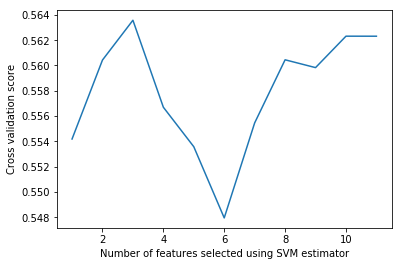

Number of features selected using LogisticRegression estimator : 4


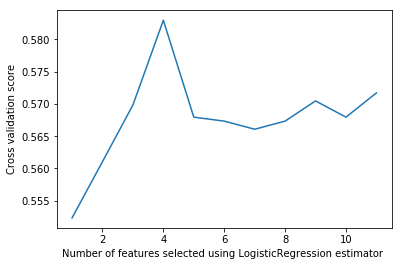

In [80]:
# Using RFECV and StratifiedKFold to run the experiment for different fold and number of iterations. This is in a way will 
# ensure that different training / test stratified splits are used. StratifiedKFold(3) results in three splits, Thus three 
# iterations in loop with different stratified training and testing data

estimatorSVMkfold = svm.SVC(kernel="linear")
selectorSVMkfold = RFECV(estimator=estimatorSVMkfold, step=1, cv=StratifiedKFold(3), scoring='accuracy')
selectorSVMkfold.fit(predictors, target)

print("Number of features selected using SVM estimator : %d" % selectorSVMkfold.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using SVM estimator")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selectorSVMkfold.grid_scores_) + 1), selectorSVMkfold.grid_scores_)
plt.show()

estimatorLRkfold = LogisticRegression(solver='lbfgs',multi_class='auto')
selectorLRkfold = RFECV(estimator=estimatorLRkfold, step=1, cv=StratifiedKFold(3), scoring='accuracy')
selectorLRkfold.fit(predictors, target)

print("Number of features selected using LogisticRegression estimator : %d" % selectorLRkfold.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using LogisticRegression estimator ")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selectorLRkfold.grid_scores_) + 1), selectorLRkfold.grid_scores_)
plt.show()



#### Conclusion

##### Above plots conclude that using kfold cross validation gives different results.
##### For SVM with out cross validation the optimal number of features selected is 5 but with cross validation it is 3
##### For Logistic Regression with out cross validation the optimal number of features selected is 5 but with cross validation it is 4

### Method 2

In [95]:
# create StratifiedKFold for five iterations
stratkfold = StratifiedKFold(n_splits=5)
print (stratkfold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [97]:
# run five iterations in loop with different stratified training and testing data
iteration = 1
svm_score = []
lr_score = []
score = []
for train_index, test_index in stratkfold.split(predictors, target):
    print ("\nIteration: %d" % iteration)
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    # create a base classifier used to evaluate a subset of attributes
    estimatorSVM = svm.SVR(kernel="linear")
    selectorSVM = RFE(estimatorSVM)
    selectorSVM = selectorSVM.fit(X_train, y_train)
    # summarize the selection of the attributes
    print(selectorSVM.support_)
    print(selectorSVM.ranking_)
    
    # create a base classifier used to evaluate a subset of attributes
    estimatorLR = LogisticRegression(solver='lbfgs',multi_class='auto')
    # create the RFE model and select 3 attributes
    selectorLR = RFE(estimatorLR)
    selectorLR = selectorLR.fit(X_train, y_train)
    # summarize the selection of the attributes
    print(selectorLR.support_)
    print(selectorLR.ranking_)
    
    predictors_train_SVMselected = selectorSVM.transform(X_train)
    predictors_test_SVMselected = selectorSVM.transform(X_test)

    predictors_train_LRselected = selectorLR.transform(X_train)
    predictors_test_LRselected = selectorLR.transform(X_test)
    
    classifier = svm.SVC(gamma='auto')

    model1 = classifier.fit(predictors_train_SVMselected, y_train)
    model1_score = model1.score(predictors_test_SVMselected, y_test)
    print("Model score with the features selected by SVM : %f" % model1_score)
    svm_score.append(model1_score)

    model2 = classifier.fit(predictors_train_LRselected, y_train)
    model2_score = model2.score(predictors_test_LRselected, y_test)
    print("Model score with the features selected by Logistic Regression : %f" % model2_score)
    lr_score.append(model2_score)

    model3 = classifier.fit(X_train, y_train)
    model3_score = model3.score(X_test, y_test)
    print("Model score with out feature selection: %f" % model3_score)
    score.append(model3_score)
    
    iteration = iteration+1
    
average_svm_score = np.mean(svm_score)
print("\nAverage model score with the features selected by SVM: ", average_svm_score)

average_lr_score = np.mean(lr_score)
print("\nAverage model score with the features selected by Logistic Regression: ", average_lr_score)

average_score = np.mean(score)
print("\nAverage model score with out any feature selection: ", average_score)


Iteration: 1
[False  True False False  True False False False  True  True  True]
[5 1 7 3 1 6 2 4 1 1 1]
[False  True  True False False False  True False False  True  True]
[7 1 1 5 3 4 1 2 6 1 1]
Model score with the features selected by SVM : 0.515528
Model score with the features selected by Logistic Regression : 0.534161
Model score with out feature selection: 0.518634

Iteration: 2
[False  True False  True  True False False False False  True  True]
[3 1 6 1 1 5 2 4 7 1 1]
[ True  True False False False False  True False False  True  True]
[1 1 3 5 6 2 1 4 7 1 1]
Model score with the features selected by SVM : 0.507788
Model score with the features selected by Logistic Regression : 0.529595
Model score with out feature selection: 0.520249

Iteration: 3
[False  True False False  True False  True False False  True  True]
[2 1 7 3 1 6 1 4 5 1 1]
[False  True  True False False False  True False False  True  True]
[2 1 1 6 4 5 1 3 7 1 1]
Model score with the features selected by SVM : 

### Task 3

Build two pipelines for training classifiers for the dataset winequality_red.csv and summarise the results from training classifiers with the pipelines in a markdown cell (max 150 words). The two pipelines should include feature-selection methods, and the feature-selection method in pipeline 1 should be different from the feature-selection method in pipeline 2.